**INITIALIZATION:**
- I use these three lines of code on top of my each notebooks because it will help to prevent any problems while reloading the same project. And the third line of code helps to make visualization within the notebook.

In [1]:
#@ INITIALIZATION: 
%reload_ext autoreload
%autoreload 2
%matplotlib inline

**LIBRARIES AND DEPENDENCIES:**
- I have downloaded all the libraries and dependencies required for the project in one particular cell.

In [2]:
#@ INSTALLING DEPENDENCIES: UNCOMMENT BELOW: 
# !pip install -Uqq fastbook
# import fastbook
# fastbook.setup_book()

In [3]:
#@ DOWNLOADING LIBRARIES AND DEPENDENCIES: 
from fastbook import *                                  # Getting all the Libraries. 
from fastai.callback.fp16 import *
from fastai.vision.all import *                         # Getting all the Libraries.

**GETTING THE DATA:**
- I will use **Imagenette** dataset here.

In [4]:
#@ GETTING THE DATASET: 
path = untar_data(URLs.IMAGENETTE_160)                  # Path to the Dataset. 
path.ls()                                               # Inspecting the Dataset.

(#4) [Path('/root/.fastai/data/imagenette2-160/train'),Path('/root/.fastai/data/imagenette2-160/.DS_Store'),Path('/root/.fastai/data/imagenette2-160/noisy_imagenette.csv'),Path('/root/.fastai/data/imagenette2-160/val')]

In [8]:
#@ GETTING IMAGE FILES: 
files = get_image_files(path)                           # Getting Image Files. 
files[0]                                                # Inspection. 

Path('/root/.fastai/data/imagenette2-160/train/n03417042/n03417042_5239.JPEG')

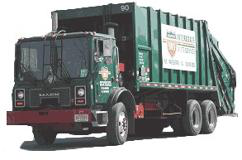

In [9]:
#@ INSEPCTING IMAGES: 
im = Image.open(files[0])                               # Initializing Image. 
im

In [10]:
#@ INSPECTING TENSORS OF IMAGES:
im_t = tensor(im)                                       # Converting into Tensors. 
im_t.shape                                              # Inspecting Tensors. 

torch.Size([160, 242, 3])

In [11]:
#@ GETTING UNIQUE FILES:
lbls = files.map(Self.parent.name()).unique(); lbls

(#10) ['n03417042','n02979186','n03425413','n03000684','n02102040','n03445777','n03028079','n01440764','n03394916','n03888257']

In [12]:
#@ CREATING VOCABULARY: 
v2i = lbls.val2idx(); v2i                               # Inspecting Vocabulary. 

{'n01440764': 7,
 'n02102040': 4,
 'n02979186': 1,
 'n03000684': 3,
 'n03028079': 6,
 'n03394916': 8,
 'n03417042': 0,
 'n03425413': 2,
 'n03445777': 5,
 'n03888257': 9}

**PREPARING DATASET:**

In [13]:
#@ DEFINING DATASET CLASS: 
class Dataset:                                                      # Defining Dataset Class. 
    def __init__(self, fns): self.fns = fns                         # Initializing Constructor Function. 
    def __len__(self): return len(self.fns)
    def __getitem__(self, i):
        im = Image.open(self.fns[i]).resize((64,64)).convert("RGB") # Getting Images.
        y = v2i[self.fns[i].parent.name]                            # Initializing Dependent Variable. 
        return tensor(im).float()/255, tensor(y)                    # Getting Tensors. 

In [14]:
#@ TRAINING AND VALIDATION FILENAMES: 
train_filt = L(o.parent.parent.name=="train" for o in files)        # Initializing Training Filters. 
train, valid = files[train_filt], files[~train_filt]                # Initializing Training and Validation Files. 
len(train), len(valid)                                              # Inspection. 

(9469, 3925)

In [15]:
#@ INITIALIZING DATASET: 
train_ds, valid_ds = Dataset(train), Dataset(valid)                 # Initializing Data Loaders. 
x, y = train_ds[0]                                                  # Getting a Dataset. 
x.shape, y                                                          # Inspection. 

(torch.Size([64, 64, 3]), tensor(0))

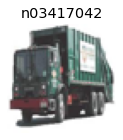

In [16]:
#@ INSPECTING A DATASET: 
show_image(x, title=lbls[y]);